In [1]:
import requests
import time
import datetime
import matplotlib.pyplot as plt

def get_iss_data():
    url = "https://api.wheretheiss.at/v1/satellites/25544"
    response = requests.get(url)
    data = response.json()

    timestamp = datetime.datetime.utcfromtimestamp(data['timestamp'])  # UNIX to UTC
    latitude = data['latitude']
    longitude = data['longitude']
    
    return timestamp, latitude, longitude

Matplotlib is building the font cache; this may take a moment.


In [2]:
data_points = []

print("Collecting 100 data points (~17 minutes)...")

for i in range(100):
    try:
        ts, lat, lon = get_iss_data()
        data_points.append((ts, lat, lon))
        print(f"{i+1:03} | {ts} | Lat: {lat:.4f}, Lon: {lon:.4f}")
    except Exception as e:
        print("Error:", e)
    time.sleep(10)

print("Collection complete!")


/var/folders/dq/7t5cgqhs25d004zsry6zzfnc0000gn/T/ipykernel_7063/2565855354.py:11: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamp = datetime.datetime.utcfromtimestamp(data['timestamp'])  # UNIX to UTC


001 | 2025-07-05 14:39:22 | Lat: -32.9573, Lon: -77.2409
002 | 2025-07-05 14:39:34 | Lat: -33.4790, Lon: -76.6070
003 | 2025-07-05 14:39:45 | Lat: -33.9537, Lon: -76.0188
004 | 2025-07-05 14:39:56 | Lat: -34.4251, Lon: -75.4235
005 | 2025-07-05 14:40:08 | Lat: -34.9354, Lon: -74.7659
006 | 2025-07-05 14:40:20 | Lat: -35.4415, Lon: -74.0996
007 | 2025-07-05 14:40:32 | Lat: -35.9433, Lon: -73.4243
008 | 2025-07-05 14:40:43 | Lat: -36.3993, Lon: -72.7973
009 | 2025-07-05 14:40:54 | Lat: -36.8514, Lon: -72.1624
010 | 2025-07-05 14:41:05 | Lat: -37.2995, Lon: -71.5195
011 | 2025-07-05 14:41:17 | Lat: -37.7837, Lon: -70.8089
012 | 2025-07-05 14:41:28 | Lat: -38.2232, Lon: -70.1488
013 | 2025-07-05 14:41:39 | Lat: -38.6583, Lon: -69.4802
014 | 2025-07-05 14:41:51 | Lat: -39.1279, Lon: -68.7410
015 | 2025-07-05 14:42:02 | Lat: -39.5536, Lon: -68.0542
016 | 2025-07-05 14:42:14 | Lat: -40.0126, Lon: -67.2948
017 | 2025-07-05 14:42:25 | Lat: -40.4282, Lon: -66.5892
018 | 2025-07-05 14:42:36 | Lat

In [3]:
timestamps = [dp[0] for dp in data_points]
latitudes  = [dp[1] for dp in data_points]
longitudes = [dp[2] for dp in data_points]

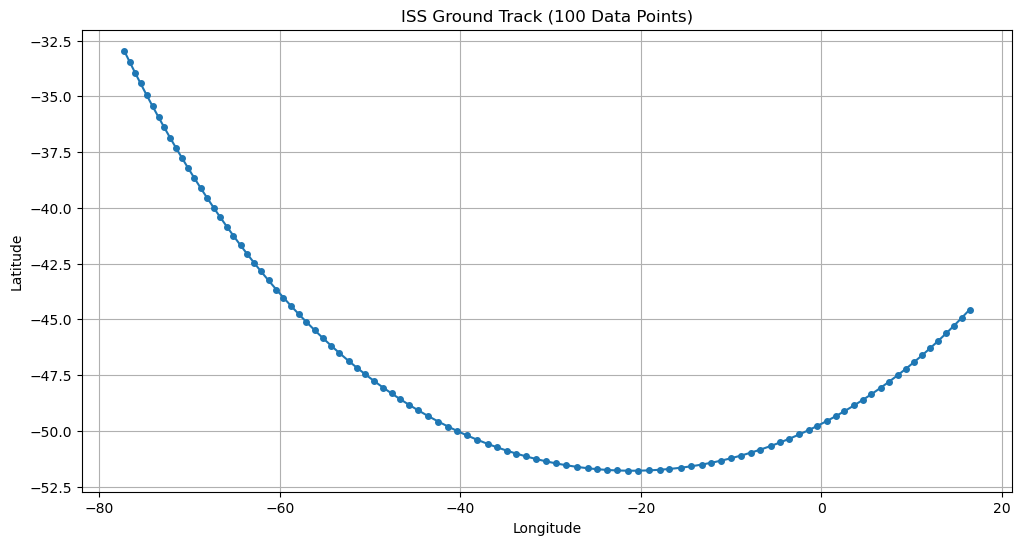

In [4]:
plt.figure(figsize=(12,6))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', markersize=4)
plt.title("ISS Ground Track (100 Data Points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()